In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('beer-servings.csv')

In [ ]:
data.head(2)

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe


In [ ]:
data.drop(['Unnamed: 0','country','continent'], axis=1, inplace=True)

In [ ]:
data.head(1)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0.0,0.0,0.0,0.0


In [ ]:
y = data["total_litres_of_pure_alcohol"]
X = data.drop("total_litres_of_pure_alcohol", axis=1)

In [ ]:
X.isna().sum()

,0
beer_servings,8
spirit_servings,8
wine_servings,6


In [ ]:
X.fillna(X.mean(), inplace=True)

In [ ]:
y.isna().sum()

np.int64(1)

In [ ]:
y.fillna(y.mean(), inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [ ]:
model = Sequential()
model.add(Input(shape=(3,)))
model.add(Dense(5, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='relu'))

In [ ]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['r2_score'])

In [ ]:
history = model.fit(X_train,
                   y_train,
                   epochs=100,
                   validation_data=(X_test, y_test))

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 15.0422 - r2_score: -0.2743 - val_loss: 24.4677 - val_r2_score: -0.2731
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 17.1706 - r2_score: -0.3728 - val_loss: 24.1099 - val_r2_score: -0.2545
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 15.6966 - r2_score: -0.2501 - val_loss: 23.7836 - val_r2_score: -0.2375
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 13.8890 - r2_score: -0.1750 - val_loss: 23.3848 - val_r2_score: -0.2168
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 13.2477 - r2_score: -0.1335 - val_loss: 22.2839 - val_r2_score: -0.1595
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 12.6029 - r2_score: -0.0751 - val_loss: 20.9301 - val_r2_score: -0.0891
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 11.9713 - r2_score: -0.1001 - val_loss: 20.0392 - val_r2_score: -0.0427
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 12.4715 - r2_score: -0.0923 - va

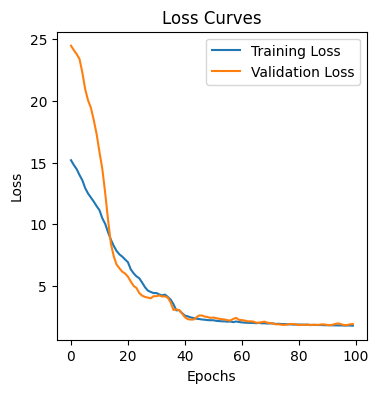

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.save('beer_model.keras')

In [ ]:
sample_input = np.array([[1,2,3]])
sample_output = model.predict(sample_input)
print(sample_output)